In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [3]:
# Definir as pastas e classes
pasta_imagens = "/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_CNN"
pastas = ['cereja', 'cafe', 'banana']
num_classes = len(pastas)

# Lista para armazenar as imagens e rótulos
imagens = []
rotulos = []

# Definir o tamanho desejado das imagens
tamanho_desejado = (224, 224)

# Carregar as imagens e seus respectivos rótulos
for classe, pasta in enumerate(pastas):
    caminho_pasta = pasta_imagens + '/' + pasta
    arquivos_imagem = os.listdir(caminho_pasta)

    for arquivo_imagem in arquivos_imagem:
        caminho_imagem = caminho_pasta + '/' + arquivo_imagem
        imagem = cv2.imread(caminho_imagem)

        if imagem is None:
            print("Erro ao ler a imagem {}. Continuando para a próxima imagem.".format(caminho_imagem))
            continue

        # Converter a imagem para o tipo de dados esperado pela função cv2.resize
        imagem = np.array(imagem, dtype=np.uint8)

        # Redimensionar a imagem para o tamanho desejado
        imagem_redimensionada = cv2.resize(imagem, tamanho_desejado)

        # Adicionar a imagem redimensionada e o rótulo às listas
        imagens.append(imagem_redimensionada)
        rotulos.append(classe)

In [4]:
# Converter as listas em arrays numpy
imagens = np.array(imagens)
rotulos = np.array(rotulos)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(imagens, rotulos, test_size=0.2, random_state=42)

# Pré-processamento dos dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Aplicar one-hot encoding nos rótulos
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Carregar a base do modelo DenseNet121, excluindo a camada de classificação
base_model = DenseNet121(weights=None, include_top=False, input_shape=(224, 224, 3))

In [5]:
# Construir o modelo final
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
32/32 [==============================] - 108s 646ms/step - loss: 0.9640 - accuracy: 0.6008 - val_loss: 5.2147 - val_accuracy: 0.3020
Epoch 2/20
32/32 [==============================] - 11s 353ms/step - loss: 0.7509 - accuracy: 0.6834 - val_loss: 1.2188 - val_accuracy: 0.3412
Epoch 3/20
32/32 [==============================] - 12s 373ms/step - loss: 0.6906 - accuracy: 0.7168 - val_loss: 1.8742 - val_accuracy: 0.2941
Epoch 4/20
32/32 [==============================] - 12s 376ms/step - loss: 0.7450 - accuracy: 0.6893 - val_loss: 1.5861 - val_accuracy: 0.3451
Epoch 5/20
32/32 [==============================] - 12s 361ms/step - loss: 0.6801 - accuracy: 0.7109 - val_loss: 1.3772 - val_accuracy: 0.3490
Epoch 6/20
32/32 [==============================] - 12s 363ms/step - loss: 0.5791 - accuracy: 0.7601 - val_loss: 1.4066 - val_accuracy: 0.3255
Epoch 7/20
32/32 [==============================] - 12s 382ms/step - loss: 0.5833 - accuracy: 0.7709 - val_loss: 2.8030 - val_accuracy: 0.321

In [6]:
from tensorflow.keras.optimizers import Adam

# Definir a taxa de aprendizado desejada
learning_rate = 0.0001

# Construir o modelo final
model_lr = Sequential()
model_lr.add(base_model)
model_lr.add(GlobalAveragePooling2D())
model_lr.add(Dense(128, activation='relu'))
model_lr.add(Dense(num_classes, activation='softmax'))

# Compilar o modelo com a taxa de aprendizado definida
model_lr.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_lr = model_lr.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
32/32 [==============================] - 87s 463ms/step - loss: 0.5474 - accuracy: 0.8220 - val_loss: 0.6567 - val_accuracy: 0.7882
Epoch 2/20
32/32 [==============================] - 12s 387ms/step - loss: 0.2920 - accuracy: 0.8977 - val_loss: 0.5138 - val_accuracy: 0.8039
Epoch 3/20
32/32 [==============================] - 12s 386ms/step - loss: 0.2666 - accuracy: 0.9066 - val_loss: 0.5078 - val_accuracy: 0.8157
Epoch 4/20
32/32 [==============================] - 12s 382ms/step - loss: 0.2130 - accuracy: 0.9282 - val_loss: 0.4730 - val_accuracy: 0.8235
Epoch 5/20
32/32 [==============================] - 12s 380ms/step - loss: 0.1974 - accuracy: 0.9351 - val_loss: 0.4697 - val_accuracy: 0.8392
Epoch 6/20
32/32 [==============================] - 12s 362ms/step - loss: 0.2230 - accuracy: 0.9233 - val_loss: 0.4268 - val_accuracy: 0.8510
Epoch 7/20
32/32 [==============================] - 12s 365ms/step - loss: 0.1794 - accuracy: 0.9312 - val_loss: 0.5308 - val_accuracy: 0.8000

In [7]:
from tensorflow.keras.optimizers import SGD

# Construir o modelo final
model_sgd = Sequential()
model_sgd.add(base_model)
model_sgd.add(GlobalAveragePooling2D())
model_sgd.add(Dense(128, activation='relu'))
model_sgd.add(Dense(num_classes, activation='softmax'))

# Compilar o modelo com o otimizador SGD
model_sgd.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history_sgd = model_sgd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
32/32 [==============================] - 46s 446ms/step - loss: 0.4170 - accuracy: 0.8977 - val_loss: 0.4692 - val_accuracy: 0.8353
Epoch 2/20
32/32 [==============================] - 12s 382ms/step - loss: 0.1721 - accuracy: 0.9656 - val_loss: 0.5145 - val_accuracy: 0.8314
Epoch 3/20
32/32 [==============================] - 12s 367ms/step - loss: 0.1261 - accuracy: 0.9715 - val_loss: 0.4111 - val_accuracy: 0.8549
Epoch 4/20
32/32 [==============================] - 12s 363ms/step - loss: 0.1295 - accuracy: 0.9646 - val_loss: 0.5357 - val_accuracy: 0.8471
Epoch 5/20
32/32 [==============================] - 12s 377ms/step - loss: 0.1086 - accuracy: 0.9695 - val_loss: 0.4342 - val_accuracy: 0.8392
Epoch 6/20
32/32 [==============================] - 12s 377ms/step - loss: 0.1063 - accuracy: 0.9705 - val_loss: 0.6768 - val_accuracy: 0.7137
Epoch 7/20
32/32 [==============================] - 11s 360ms/step - loss: 0.0877 - accuracy: 0.9735 - val_loss: 0.5749 - val_accuracy: 0.8118

In [8]:
# Imprimir a acurácia durante o treinamento
accuracy = [f"{acc*100:.2f}%" for acc in history.history['accuracy']]
print("Acurácia durante o treinamento:")
print(accuracy)
print()

# Imprimir a perda durante o treinamento com duas casas decimais
loss = [f"{l:.2f}" for l in history.history['loss']]
print("Perda durante o treinamento:")
print(loss)
print()

Acurácia durante o treinamento:
['60.08%', '68.34%', '71.68%', '68.93%', '71.09%', '76.01%', '77.09%', '77.88%', '77.09%', '79.06%', '82.01%', '82.20%', '84.07%', '82.69%', '80.43%', '83.78%', '87.22%', '85.55%', '83.97%', '86.23%']

Perda durante o treinamento:
['0.96', '0.75', '0.69', '0.75', '0.68', '0.58', '0.58', '0.56', '0.55', '0.53', '0.46', '0.48', '0.43', '0.45', '0.49', '0.42', '0.36', '0.36', '0.42', '0.37']



In [9]:
# Imprimir a acurácia durante o treinamento
accuracy_lr = [f"{acc*100:.2f}%" for acc in history_lr.history['accuracy']]
print("Acurácia durante o treinamento (Learning Rate):")
print(accuracy_lr)
print()

# Imprimir a perda durante o treinamento com duas casas decimais
loss_lr = [f"{l:.2f}" for l in history_lr.history['loss']]
print("Perda durante o treinamento (Learning Rate):")
print(loss_lr)
print()

Acurácia durante o treinamento (Learning Rate):
['82.20%', '89.77%', '90.66%', '92.82%', '93.51%', '92.33%', '93.12%', '93.81%', '93.81%', '94.00%', '95.48%', '94.89%', '94.79%', '95.18%', '95.08%', '94.69%', '95.58%', '95.87%', '96.46%', '97.35%']

Perda durante o treinamento (Learning Rate):
['0.55', '0.29', '0.27', '0.21', '0.20', '0.22', '0.18', '0.18', '0.17', '0.17', '0.13', '0.14', '0.13', '0.13', '0.14', '0.15', '0.12', '0.11', '0.10', '0.10']



In [10]:
# Imprimir a acurácia durante o treinamento
accuracy_sgd = [f"{acc*100:.2f}%" for acc in history_sgd.history['accuracy']]
print("Acurácia durante o treinamento (SGD):")
print(accuracy_sgd)
print()

# Imprimir a perda durante o treinamento com duas casas decimais
loss_sgd = [f"{l:.2f}" for l in history_sgd.history['loss']]
print("Perda durante o treinamento (SGD):")
print(loss_sgd)
print()

Acurácia durante o treinamento (SGD):
['89.77%', '96.56%', '97.15%', '96.46%', '96.95%', '97.05%', '97.35%', '97.44%', '96.36%', '96.46%', '97.15%', '98.23%', '97.74%', '97.54%', '96.85%', '98.13%', '97.25%', '97.44%', '98.03%', '96.76%']

Perda durante o treinamento (SGD):
['0.42', '0.17', '0.13', '0.13', '0.11', '0.11', '0.09', '0.09', '0.10', '0.10', '0.09', '0.07', '0.08', '0.08', '0.08', '0.06', '0.08', '0.08', '0.06', '0.09']



In [11]:
model.summary()
print()
model_lr.summary()
print()
model_sgd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 7,169,091
Trainable params: 7,085,443
Non-trainable params: 83,648
_________________________________________________________________

Model: "sequential_1"
_________________________________________________________________
 Layer (type)     

In [12]:
# Salvar o modelo com o nome model_sgd.h5
model_sgd.save('/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_inferencia/model_sgd_densenet.h5')

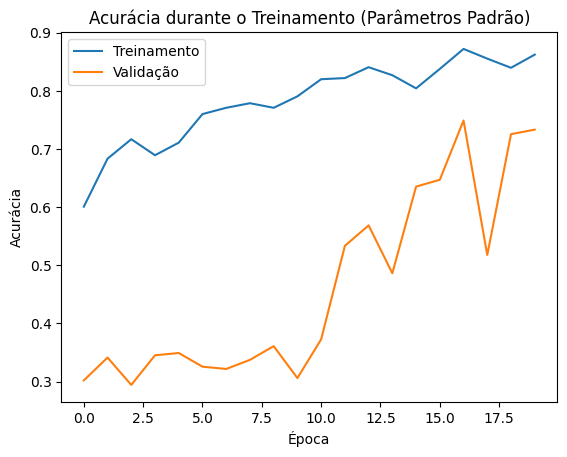

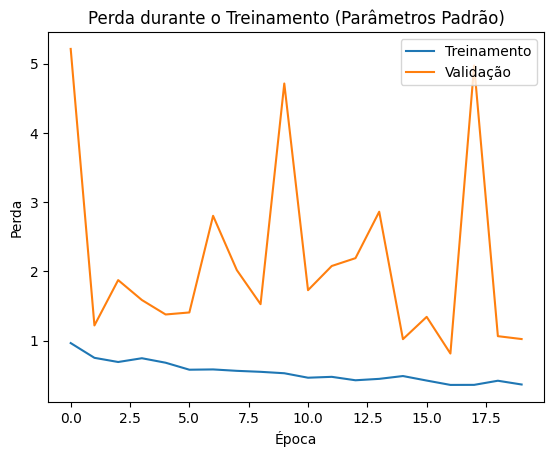

In [13]:
# Plotar gráfico de acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia durante o Treinamento (Parâmetros Padrão)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

# Plotar gráfico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda durante o Treinamento (Parâmetros Padrão)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

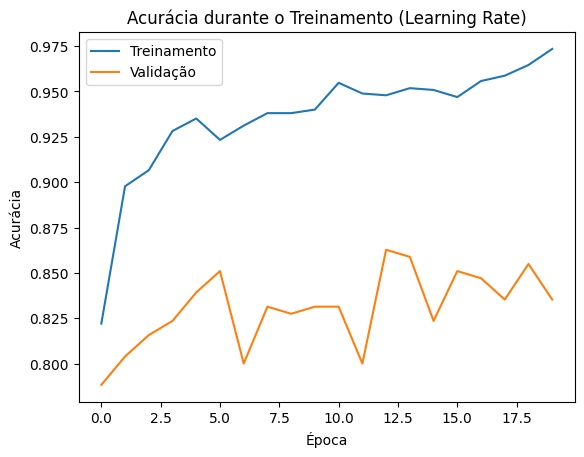

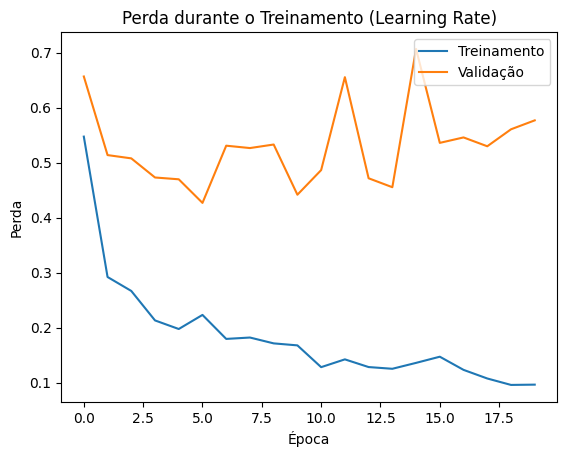

In [14]:
# Plotar gráfico de acurácia
plt.plot(history_lr.history['accuracy'])
plt.plot(history_lr.history['val_accuracy'])
plt.title('Acurácia durante o Treinamento (Learning Rate)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

# Plotar gráfico de perda
plt.plot(history_lr.history['loss'])
plt.plot(history_lr.history['val_loss'])
plt.title('Perda durante o Treinamento (Learning Rate)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

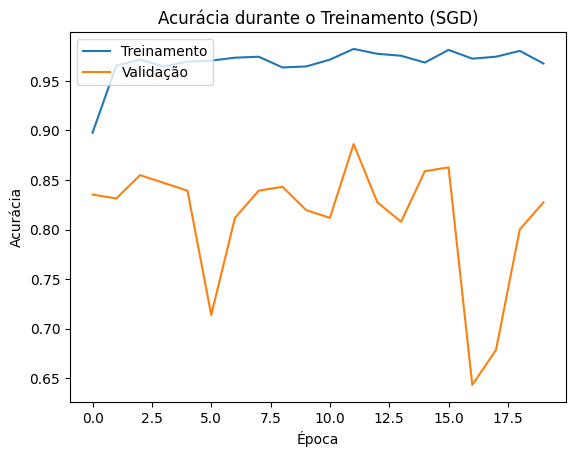

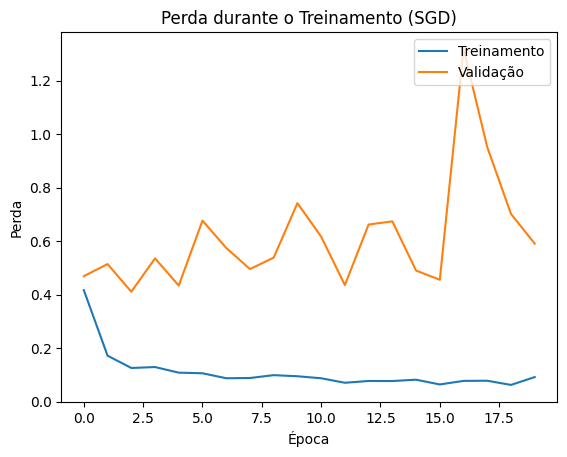

In [15]:
# Plotar gráfico de acurácia
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('Acurácia durante o Treinamento (SGD)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.show()

# Plotar gráfico de perda
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('Perda durante o Treinamento (SGD)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2

# Carregar o modelo treinado
modelo = load_model('/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_inferencia/model_sgd_densenet.h5')

# Carregar a imagem a ser reconhecida
caminho_imagem = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_inferencia/img.png'
imagem = cv2.imread(caminho_imagem)

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print("Erro ao carregar a imagem. Verifique o caminho e o formato da imagem.")
    exit()

# Redimensionar a imagem para o tamanho desejado
tamanho_desejado = (224, 224)
imagem_redimensionada = cv2.resize(imagem, tamanho_desejado)

# Realizar a previsão
previsao = modelo.predict(imagem_redimensionada.reshape(1, 224, 224, 3))

# Mapear as classes para seus respectivos rótulos
classes = ['cereja', 'cafe', 'banana']
resultado = previsao.argmax(axis=-1)
classe_prevista = classes[resultado[0]]

# Exibir o resultado da previsão
print("A imagem é classificada como:", classe_prevista)

1/1 [==============================] - 2s 2s/step
A imagem é classificada como: banana
